In [29]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\\Users\\Pranjal\Desktop\data\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker']=label_encoder.fit_transform(df['smoker'])
df['region']=label_encoder.fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [8]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


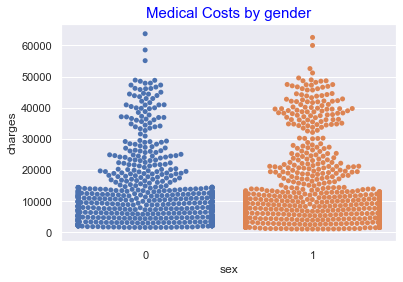

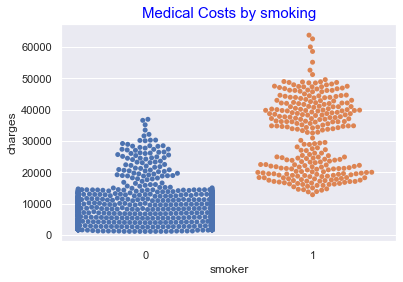

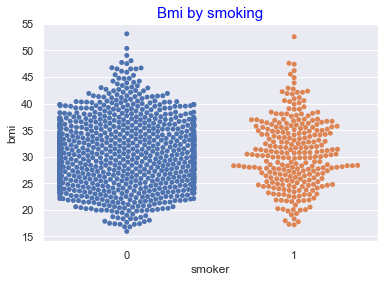

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
sns.swarmplot(x="sex",y="charges",data=df)
plt.title("Medical Costs by gender",color='blue',fontsize=15)
plt.show()
sns.swarmplot(x="smoker",y="charges",data=df)
plt.title("Medical Costs by smoking",color='blue',fontsize=15)
plt.show()
sns.swarmplot(x="smoker",y="bmi",data=df)
plt.title("Bmi by smoking",color='blue',fontsize=15)
plt.show()

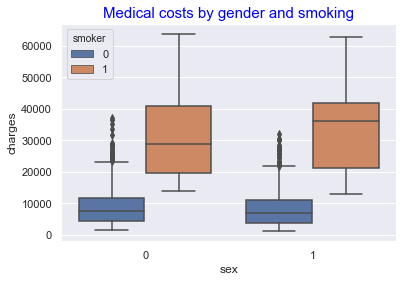

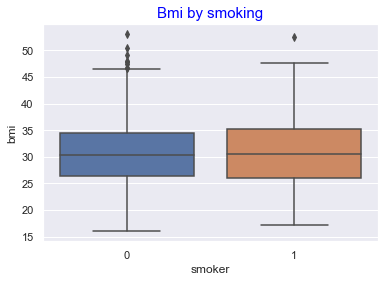

In [14]:
sns.boxplot(x="sex",y="charges",hue="smoker",data=df)
plt.title('Medical costs by gender and smoking',color='blue',fontsize=15)
plt.show()
sns.boxplot(x="smoker",y="bmi",data=df)
plt.title("Bmi by smoking",color='blue',fontsize=15)
plt.show()

In [15]:
df = pd.get_dummies(df, columns = ["region"], prefix = ["region"], drop_first=False)
df.head()

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2,region_3
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [19]:
from sklearn.model_selection import train_test_split
X = df.drop(["charges"],axis = 1)
y = df['charges']
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
leaf_model=RandomForestRegressor(random_state=42)
leaf_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [25]:
leaf_model.predict(x_test)[0:5]

array([ 9460.342165 ,  5376.7219435, 28085.39301  , 12987.205841 ,
       34672.8637448])

In [27]:
y_pred=leaf_model.predict(x_test)

In [33]:
np.sqrt(mean_squared_error(y_test,y_pred))

4589.128871712189

In [34]:
# RF R2 score for test data
r2_score(y_test, y_pred)

0.8643460490864086

RF model tuning

In [36]:
rf_params={'max_depth':list(range(1,10)),'max_features':[2,3,5,7],'n_estimators':[100,200,500,1000,1500]}
rf_model=RandomForestRegressor(random_state=42)

In [37]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1,verbose = 2)

In [38]:
rf_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  7.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [39]:
rf_cv_model.best_params_

{'max_depth': 4, 'max_features': 7, 'n_estimators': 1000}

In [40]:
rf_tuned = RandomForestRegressor(max_depth  = 4,  max_features = 7, n_estimators =1000)

In [42]:
rf_tuned.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [43]:
y_pred = rf_tuned.predict(x_test)

In [44]:
# RF RMSE test score after model tuning
rf_rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))
rf_rmse_final

4397.286799347594

In [45]:
# RF R2 for test data after model tuning
rf_r2_final = r2_score(y_test, y_pred)
rf_r2_final

0.8754506332520906

Text(0.5, 0, 'Importance Levels of Variables')

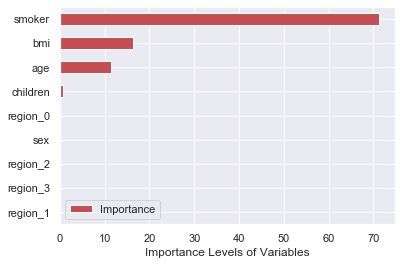

In [47]:
# Importance level of independent variables through RF
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = x_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Importance Levels of Variables")

Conclusion

Here,I use random forest classifier to get better accuracy 